In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:

# Load the data
data =  pd.read_csv('imdb_data.csv')
data = data.drop_duplicates(subset=['title','rating','country','genre','director','writer','company'], keep='first').reset_index()

# Define the features and target variable
X = data.drop(['titleId', 'title', 'score'], axis=1)
y = data['score']

# Encode categorical variables using one-hot encoding
cat_cols = ['region', 'genre', 'director', 'writer', 'country', 'company']
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = enc.fit_transform(X[cat_cols])
X_cat_names = enc.get_feature_names_out(cat_cols)
X_cat_df = pd.DataFrame(X_cat, columns=X_cat_names)

# Combine one-hot encoded features with numeric features
num_cols = ['year', 'day', 'budget', 'gross', 'runtime']
X_num = X[num_cols].fillna(0)
X_all = pd.concat([X_num, X_cat_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)




FileNotFoundError: ignored

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


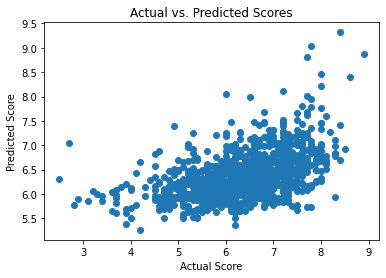

Mean Squared Error: 0.72
R-squared: 0.23


<ipython-input-19-b3f2964b9979>:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y, hist=False, color="r", label="Actual")
<ipython-input-19-b3f2964b9979>:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)


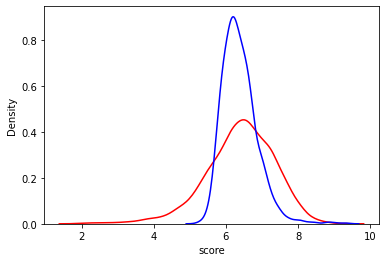

In [ ]:
# Load the data and drop duplicates
data =  pd.read_csv('imdb_data.csv')
data = data.drop_duplicates(subset=['title']).dropna()
data = data.drop(['knownForTitles', 'month', 'day', 'primaryName', 'titleId', 'title', 'region', 'released', 'year', 'director', 'writer', 'star', 'country', 'gross', 'company', 'category', 'nconst'], axis=1).reset_index()

# Split into features and target
X = data.drop(['score'], axis=1)
y = data['score']

# Encode categorical variables using one-hot encoding
cat_cols = ['genre','rating']
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = enc.fit_transform(X[cat_cols])
X_cat_names = enc.get_feature_names_out(cat_cols)
X_cat_df = pd.DataFrame(X_cat, columns=X_cat_names)

# Combine one-hot encoded features with numeric features
num_cols = ['budget','runtime']
X_num = X[num_cols].fillna(0)
X_all = pd.concat([X_num, X_cat_df], axis=1)

# Normalize the numeric features
scaler = StandardScaler()
X_all[num_cols] = scaler.fit_transform(X_all[num_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Set up hyperparameter search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train a linear regression model with Ridge regularization and hyperparameter tuning
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
ridge = Ridge(alpha=best_params['alpha'])
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the actual vs. predicted scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Scores')
plt.show()

# Print the evaluation metrics
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Plot the distribution of actual and predicted scores
ax=sns.distplot(y, hist=False, color="r", label="Actual")
sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)
plt.show()